# Prélude du projet 

## 1. Objectif :
   - Prédire si un prêt immobilier sera accordé ou pas.


## 2. Métriques :

### Importation des bibliothèques

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

### Suppression des avertissements

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

### Importation des données

In [4]:
data = pd.read_csv('train.csv')

In [5]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Affichage des données en entier

In [6]:
pd.set_option('display.max_row', 13)
pd.set_option('display.max.column', 13)

In [7]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Analyse Exploratoire des Données

## Analyse de forme :

   - **Variable target :** Loan_Status
   - **Valeurs manquantes :** Les variables Credit_History et Self_Employed ont le plus de valeurs manquantes
   - **Doublons :** Pas de doublons dans les données
   - **Dimensions du dataframe :** 614 lignes et 13 colonnes
   - **Types des variables :** Trois types de variables à savoir object, float64, int64, qualitatives : 8, quantitatives : 5
   

### Duplication du dataframe

In [8]:
df = data.copy()

In [9]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Vérification des dimensions

In [10]:
df.shape

(614, 13)

### Analyse des différents types de nos variables

In [11]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<AxesSubplot:ylabel='None'>

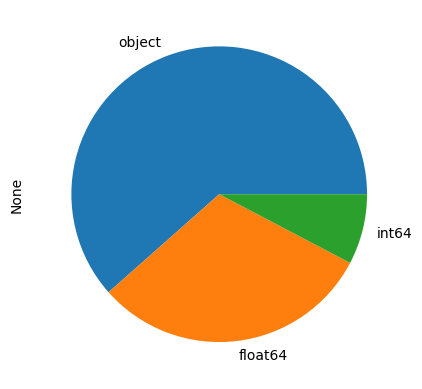

In [12]:
df.dtypes.value_counts().plot.pie()

In [13]:
df.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [14]:
df.dtypes.value_counts(normalize=True)

object     0.615385
float64    0.307692
int64      0.076923
dtype: float64

In [15]:
df.dtypes.value_counts(normalize=True)*100

object     61.538462
float64    30.769231
int64       7.692308
dtype: float64

### Analyse des valeurs manquantes

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

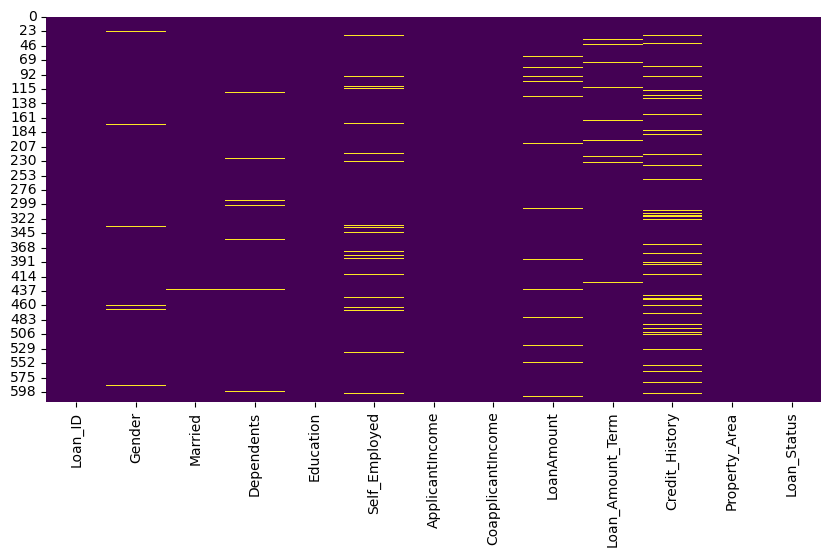

In [18]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cmap='viridis', cbar=False)

### Analyse des doublons

In [19]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [20]:
df[df.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


## Analyse de fond :

   - **Variable target :** le nombre de prêts acceptés dépasse celui des refus.
   - **ApplicantIncome :** Le mode est de 2500, on constate la présence de valeurs aberrantes. Sa courbe de densité est asymétrique et tirée vers la droite. Ceux qui demandent le prêt ont un revenu median de 3812.5.
   - **Variables quantitatives :** On constate que les distributions de toiutes les variables sont asymétriques, présence de beaucoup de valeurs aberrantes.
   - **Variables qualitatives :** Il y a plus d'hommes que de femmes, la majorité des candidats sont mariés, salariés et diplômés, avec 0 charges. La zone d'habitation n apparemment n'a pas de l'influence sur la décision finale.
   
   - **Relation Target / Variables :** Pour les variables quantitatives(continues comme discrètes) les histogrammes conviennent pour faire une analyse. Par contre les diagrammes à barres ne sont pas adaptés aux variables quantitatives continues, mais seulement aux variables quantitatives discrètes. Rien de particulier observé au niveau des variables quantitatives. En revanche au niveau des variables qualitatives : 1. le genre influencerait-il la décision finale du statut de prêt ?  2. Il semblerait que la zone de résidence ne soit pas importante pour obtenir un prêt immobilier.

### Analyse de la variable target

In [21]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

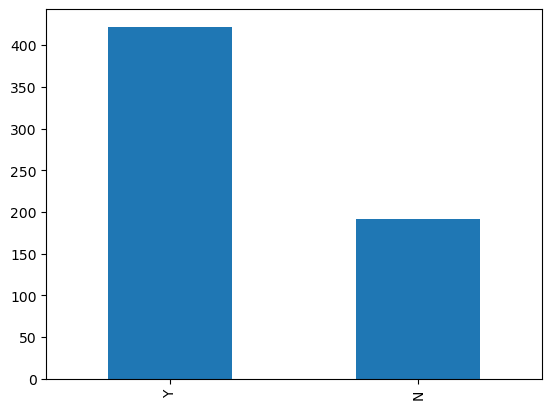

In [22]:
df['Loan_Status'].value_counts().plot.bar()

In [23]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [24]:
df['Loan_Status'].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

In [25]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Élimination des colonnes inutiles

In [26]:
df = df.drop('Loan_ID', axis=1)

In [27]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [28]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Education            0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Property_Area        0.000000
Loan_Status          0.000000
Married              0.004886
Gender               0.021173
Loan_Amount_Term     0.022801
Dependents           0.024430
LoanAmount           0.035831
Self_Employed        0.052117
Credit_History       0.081433
dtype: float64

### Variables quantitatives

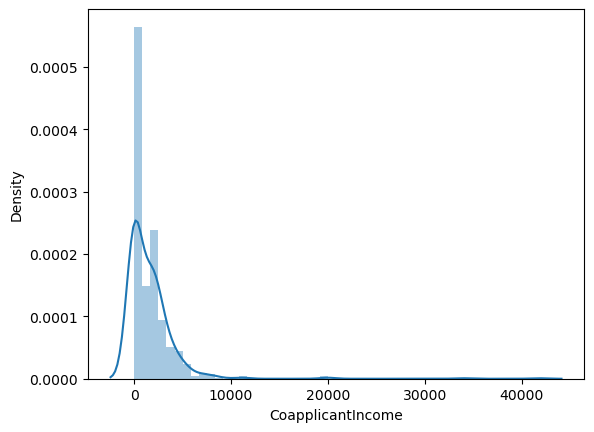

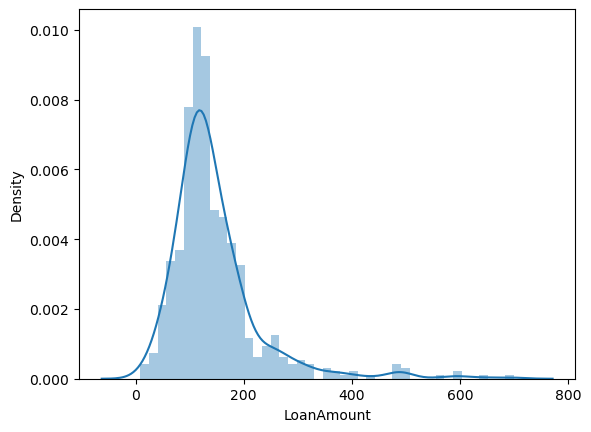

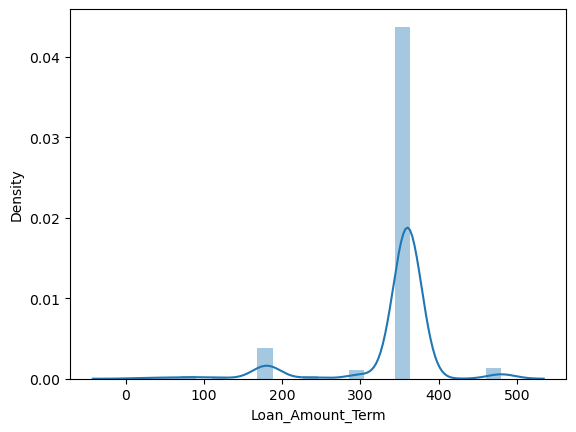

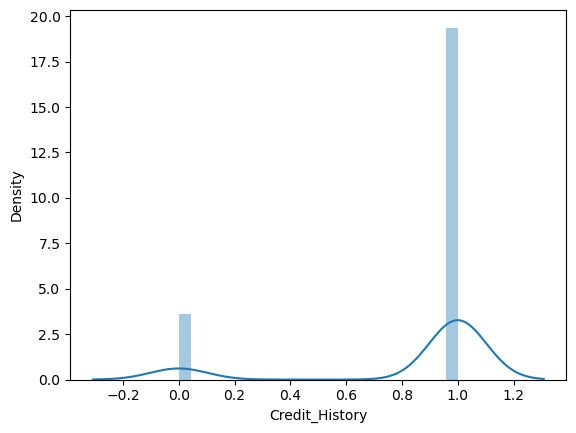

In [29]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

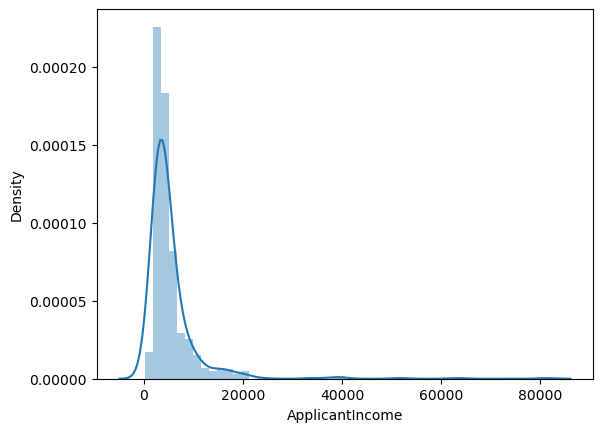

In [30]:
for col in df.select_dtypes('int'):
    plt.figure()
    sns.distplot(df[col])

In [31]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


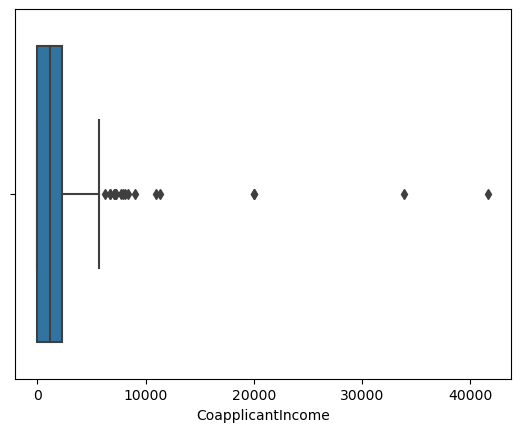

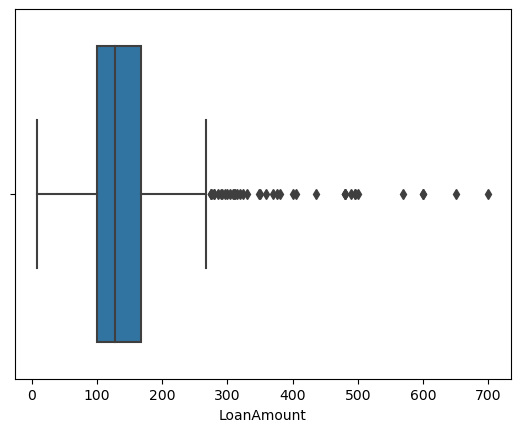

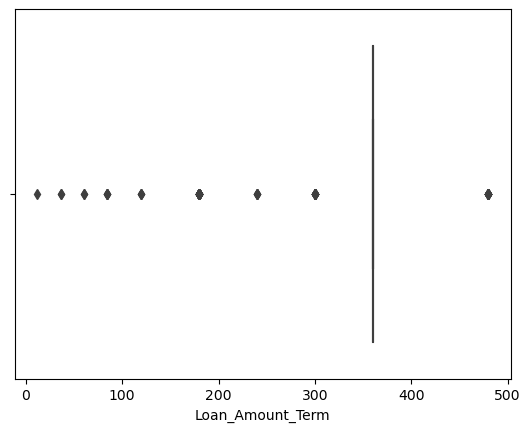

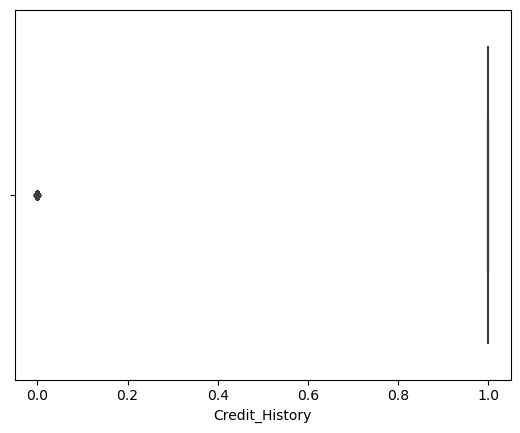

In [32]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.boxplot(df[col])

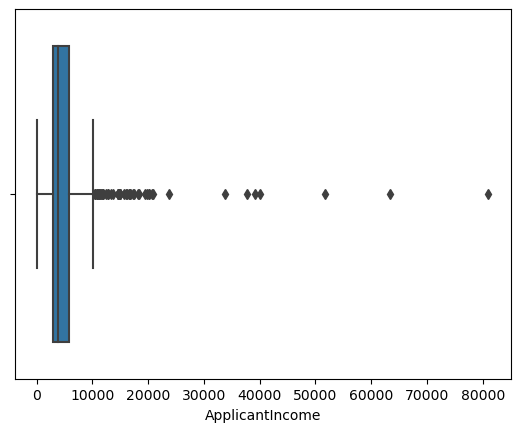

In [33]:
for col in df.select_dtypes('int'):
    plt.figure()
    sns.boxplot(df[col])

### Variables qualitatives

In [34]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

Gender-------------------------------------------- ['Male' 'Female' nan]
Married------------------------------------------- ['No' 'Yes' nan]
Dependents---------------------------------------- ['0' '1' '2' '3+' nan]
Education----------------------------------------- ['Graduate' 'Not Graduate']
Self_Employed------------------------------------- ['No' 'Yes' nan]
Property_Area------------------------------------- ['Urban' 'Rural' 'Semiurban']
Loan_Status--------------------------------------- ['Y' 'N']


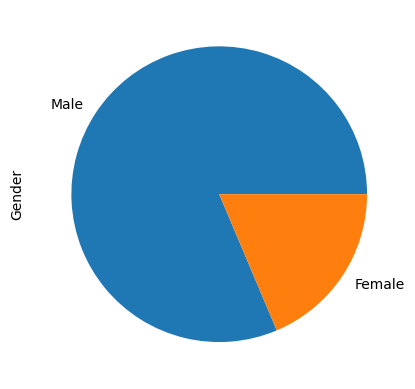

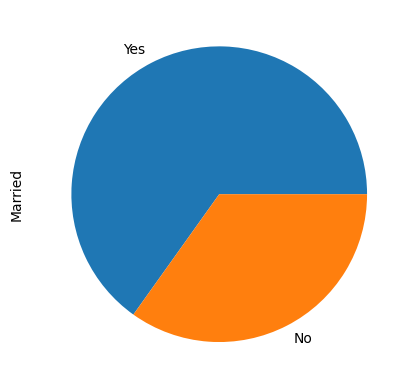

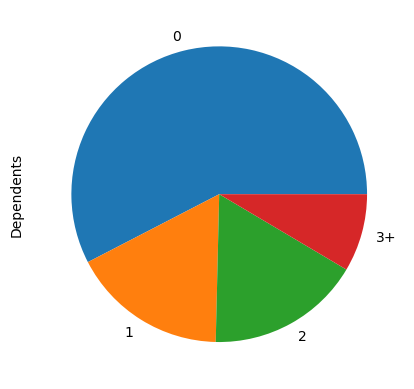

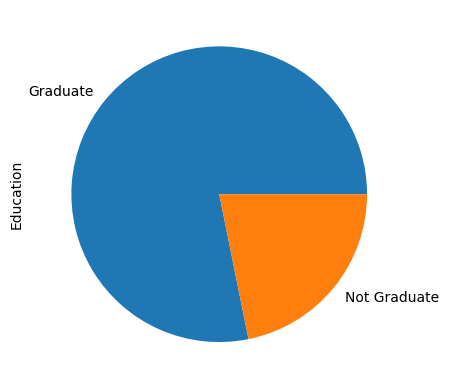

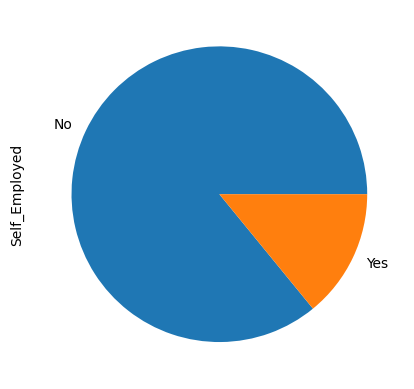

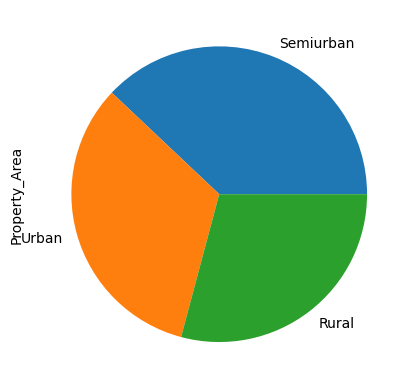

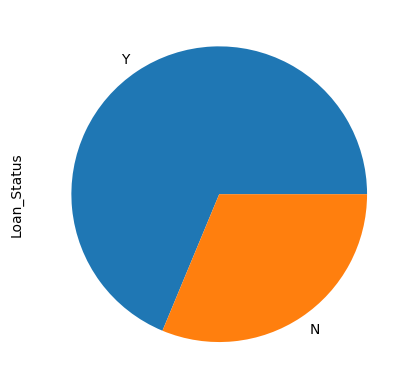

In [35]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

### Relation Target / Variables

#### Target / Variables quantitatives

In [36]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [37]:
positive_df = df[df['Loan_Status']=='Y']

In [38]:
negative_df = df[df['Loan_Status']=='N']

In [39]:
positive_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [40]:
negative_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
13,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
17,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
596,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
597,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
605,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N


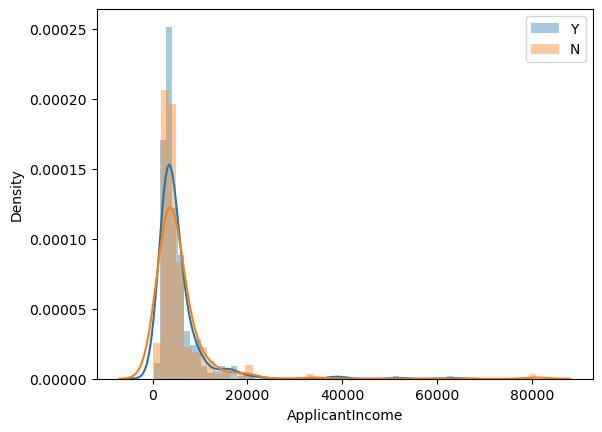

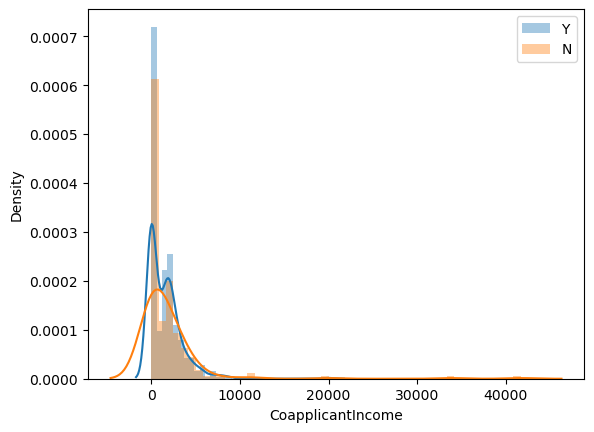

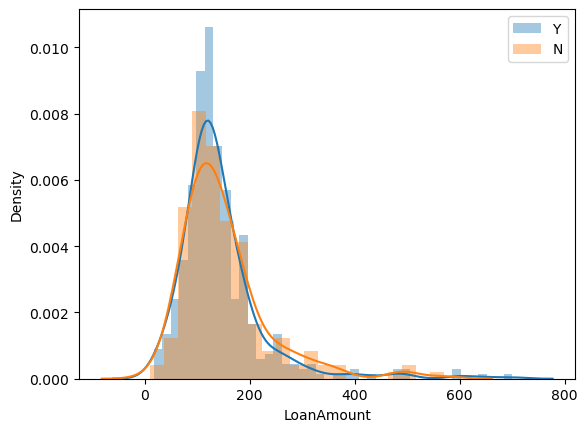

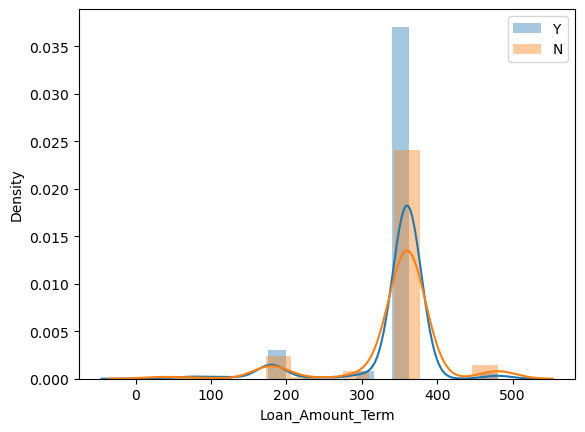

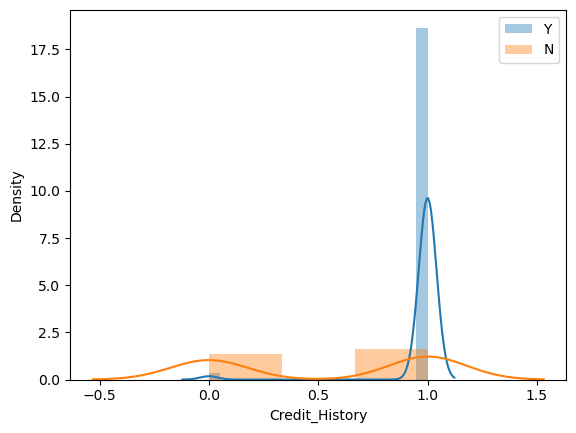

In [41]:
for col in df.select_dtypes(include=['int', 'float']):
    plt.figure()
    sns.distplot(positive_df[col], label='Y')
    sns.distplot(negative_df[col], label='N')
    plt.legend()

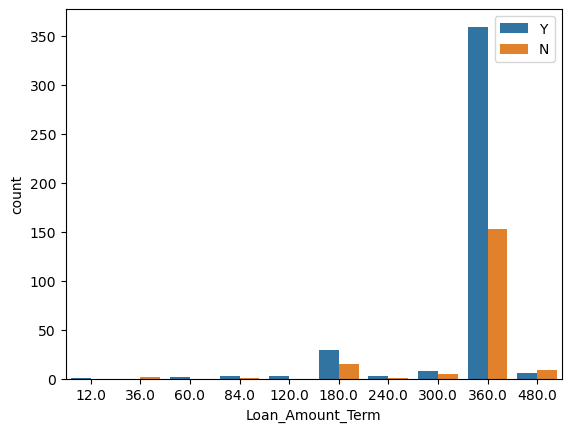

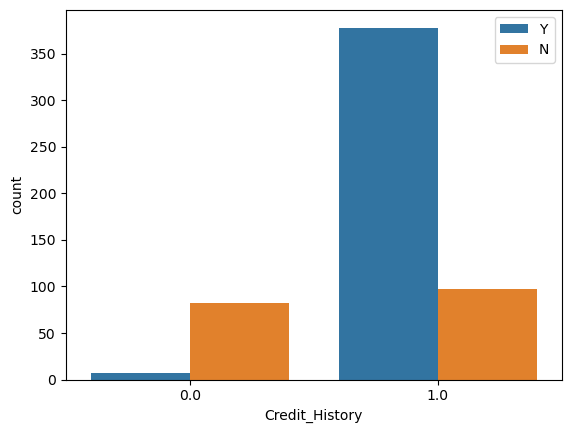

In [42]:
for col in df[['Loan_Amount_Term', 'Credit_History']]:
    plt.figure()
    sns.countplot(x=col, hue='Loan_Status', data=df)
    plt.legend()

#### Target / Variables qualitatives

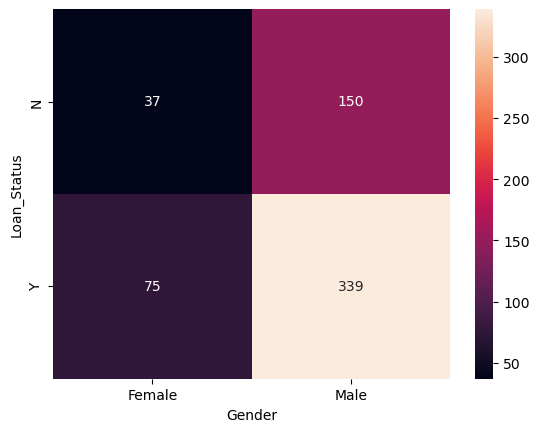

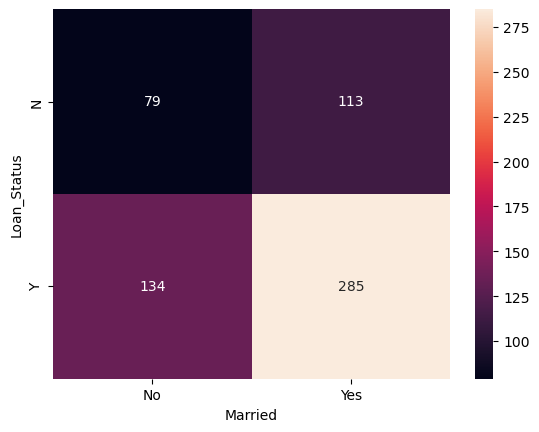

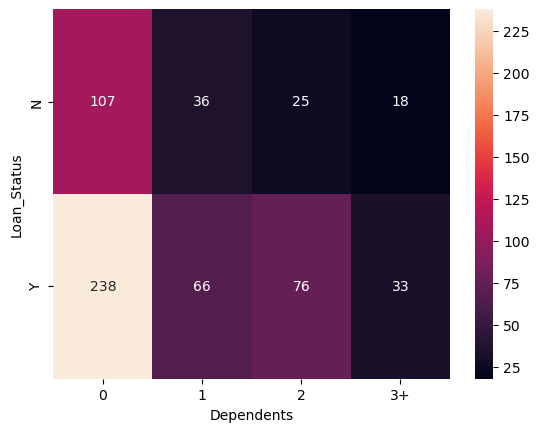

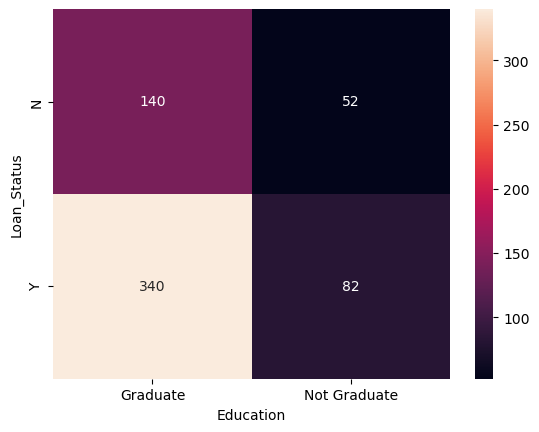

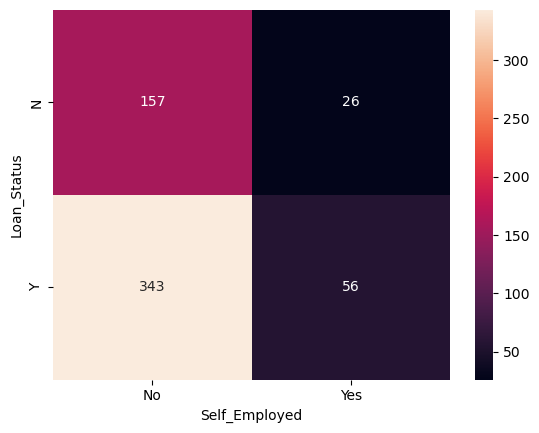

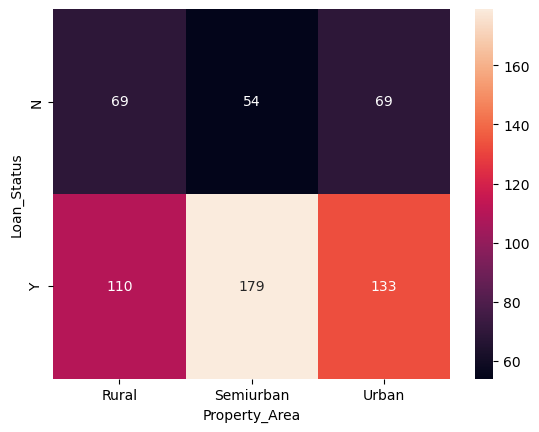

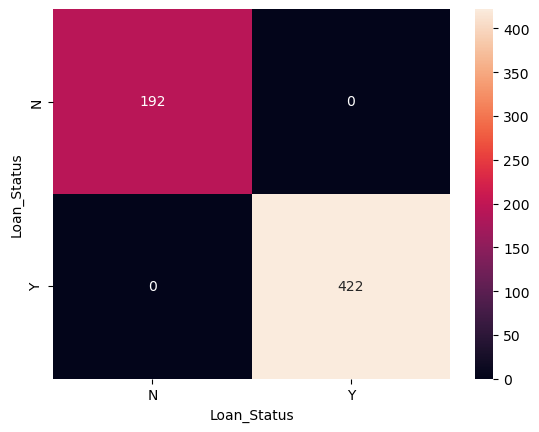

In [43]:
for col in df.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(df['Loan_Status'], df[col]), annot=True, fmt='d')

### Tests Statistiques entre Target / Variables

#### Target / Gender

In [44]:
pd.crosstab(df['Loan_Status'], df['Gender'])

Gender,Female,Male
Loan_Status,,
N,37,150
Y,75,339


<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

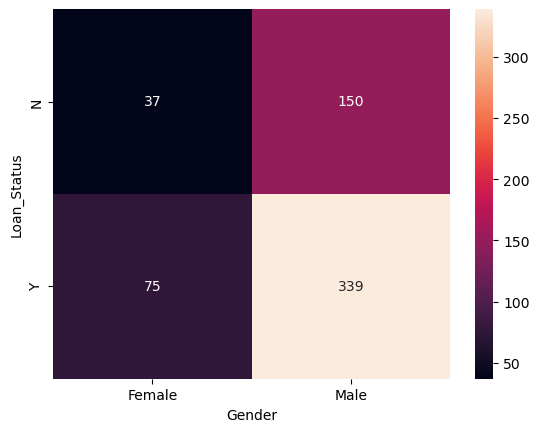

In [45]:
plt.figure()
sns.heatmap(pd.crosstab(df['Loan_Status'], df['Gender']), annot=True, fmt='d')

In [46]:
def chi2(col1, col2):
    alpha = 0.05
    stat, p, a, b = chi2_contingency(pd.crosstab(df[col1], df[col2]))
    if p < alpha :
        return ("H1 conservée : les deux variables sont liées")
    else :
        return ("H0 conservée : les deux variables sont indépendantes")

In [47]:
chi2('Loan_Status', 'Gender')

'H0 conservée : les deux variables sont indépendantes'

In [48]:
chi2('Loan_Status', 'Property_Area')

'H1 conservée : les deux variables sont liées'

## Analyse Détaillée

### Relation Variables / Variables

In [49]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Figure size 640x480 with 0 Axes>

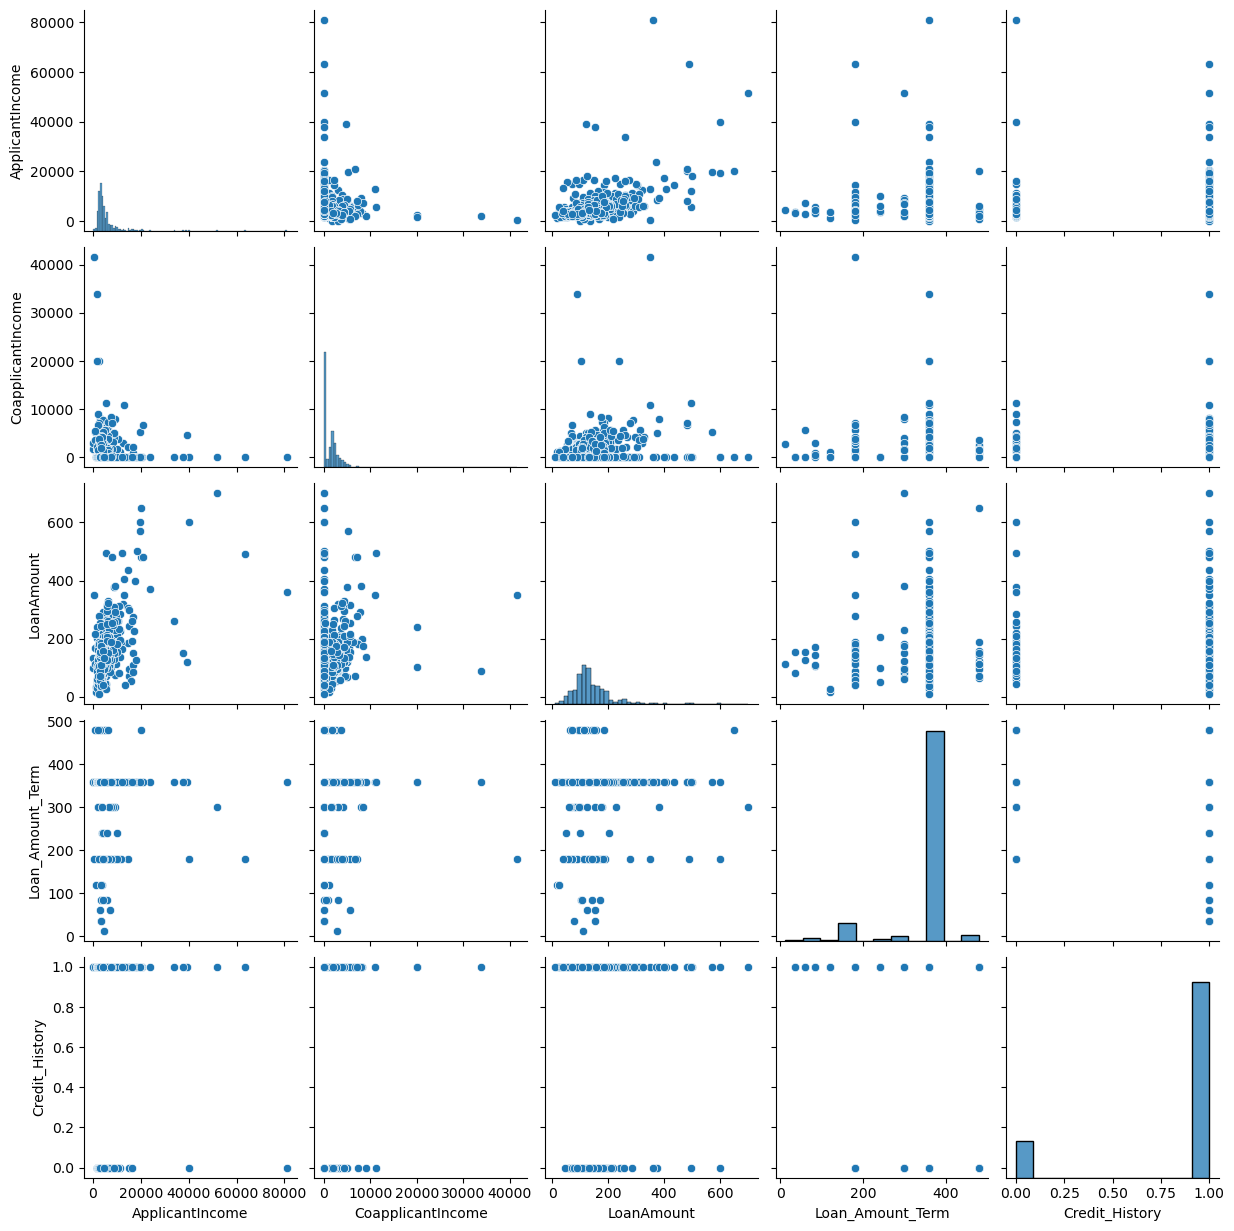

In [50]:
plt.figure()
sns.pairplot(df)

# Pre-processing

### Duplication du dataframe

In [54]:
df1 = data.copy()

In [55]:
df2 = pd.read_csv('test.csv')

In [56]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [57]:
Df = pd.concat([df1, df2], axis=0)

In [58]:
Df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [97]:
Df = Df.drop('Loan_ID', axis=1)

In [98]:
Df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [99]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            978 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


### Train / Test

In [121]:
trainset, testset = train_test_split(Df, test_size=0.2, random_state=0)

In [122]:
trainset['Loan_Status'].value_counts()

Y    342
N    159
Name: Loan_Status, dtype: int64

In [123]:
testset['Loan_Status'].value_counts()

Y    80
N    33
Name: Loan_Status, dtype: int64

### Encodage

In [124]:
for col in Df.select_dtypes('object'):
    print(f'{col :-<50} {Df[col].unique()}')

Gender-------------------------------------------- ['Male' 'Female' nan]
Married------------------------------------------- ['No' 'Yes' nan]
Dependents---------------------------------------- ['0' '1' '2' '3+' nan]
Education----------------------------------------- ['Graduate' 'Not Graduate']
Self_Employed------------------------------------- ['No' 'Yes' nan]
Property_Area------------------------------------- ['Urban' 'Rural' 'Semiurban']
Loan_Status--------------------------------------- ['Y' 'N' nan]


In [125]:
def encodage(df):
    
    code = {
        'N':0,
        'Y':1,
        'Female':0,
        'Male':1,
        'No':0,
        'Yes':1,
        'Not Graduate':0,
        'Graduate':1,
        'Rural':0,
        'Semiurban':1,
        'Urban':2,
        '0':0,
        '1':1,
        '2':2,
        '3+':3
    }
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
    
    return df

### Imputation

In [126]:
def imputation(df):
    
    df = df.dropna(axis=0)
    
    return df

### Preprocessing

In [129]:
def preprocessing(df):
    
    df = encodage(df)
    df = imputation(df)
    
    X = df.drop('Loan_Status', axis=1)
    y = df['Loan_Status']
    
    print(y.value_counts())
    
    return X, y

In [130]:
X_train, y_train = preprocessing(trainset)

1.0    263
0.0    122
Name: Loan_Status, dtype: int64


In [134]:
X_test, y_test = preprocessing(testset)

1.0    69
0.0    26
Name: Loan_Status, dtype: int64


### Procédure d'évaluation

In [ ]:
def 